In [0]:
# Import statements 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the train test split
from sklearn.model_selection import train_test_split

# Import the algs
from sklearn.tree import DecisionTreeClassifier

# Read in the data.
data = np.asarray(pd.read_csv('data.csv'))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

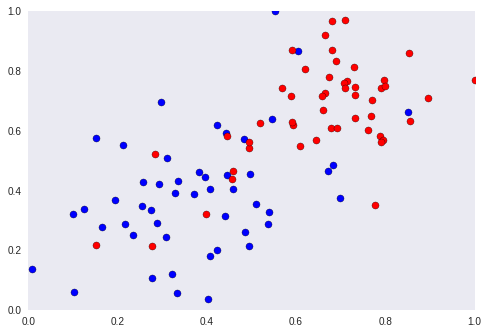

In [4]:
#Used to plot data in csv
def plot_points(X,y):
  plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
  plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.grid(False)
  plt.tick_params(
      axis='x',
      which='both',
      bottom=False,
      top=False)
  plt.show()
  
plot_points(X,y)

In [0]:
# Use train test split to split your data 
# Use a test size of 25% and a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50
                                                   )

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


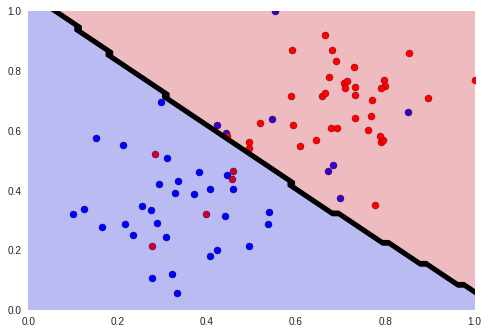

0.85


In [50]:
# using neural network
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(X,y)
plot_model(X_train,y_train,classifier)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

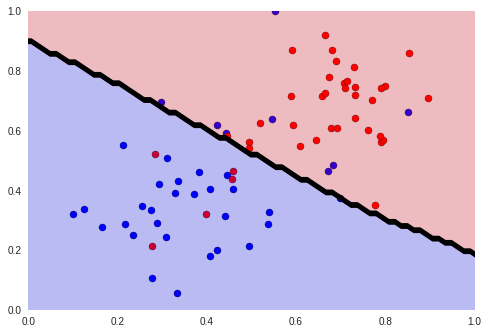

In [26]:
#Used to plot the resulting model
def plot_model(X, y, clf):
    plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which=False,
        bottom=False,
        top=False)

    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    z = clf.predict(h)

    s = s.reshape((np.size(r),np.size(r)))
    t = t.reshape((np.size(r),np.size(r)))
    z = z.reshape((np.size(r),np.size(r)))

    plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.show()
 
plot_model(X_train,y_train,classifier)

Podemos perceber no exemplo abaixo uma situação de overfitting, a qual tentamos especificar muito o modelo de nosso dados e acamos por fim deixando ele menos genérico para realizar as predições.


**Ao diminuir o número de treino e aumentar a taxa de randomização conseguimos um resultado melhor. **

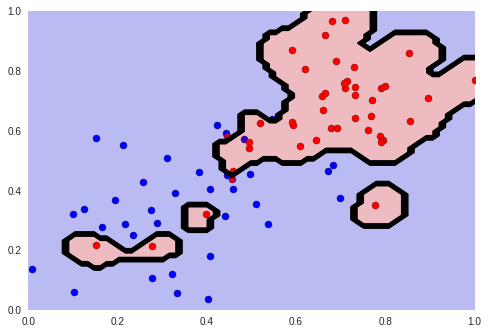

0.9


In [55]:
# Support Vector Machine Classifier
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma = 500)
classifier.fit(X_train,y_train)
plot_model(X_train,y_train,classifier)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)